# 7.3.2 Advanced CNN Architectures

Advanced Convolutional Neural Networks (CNNs) have revolutionized the field of computer vision by introducing deeper and more sophisticated architectures. In this section, we will explore three prominent advanced CNN architectures: VGG16, ResNet50, and InceptionV3. Each of these architectures brings unique innovations that address the limitations of traditional CNNs, enhancing their performance and applicability to a wide range of tasks.

___
___
### Readings:
- [5 Popular CNN Architectures Clearly Explained and Visualized](https://readmedium.com/en/https:/towardsdatascience.com/5-most-well-known-cnn-architectures-visualized-af76f1f0065e)
- [A Comprehensive Guide to Types of CNN Architectures](https://medium.com/@navarai/unveiling-the-diversity-a-comprehensive-guide-to-types-of-cnn-architectures-9d70da0b4521)
- [CNN Architectures: LeNet, AlexNet, VGG, GoogLeNet, ResNet and more…](https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5)
- [Advanced Topics in Deep Convolutional Neural Networks](https://towardsdatascience.com/advanced-topics-in-deep-convolutional-neural-networks-71ef1190522d)

___
___


## Overview of Advanced CNN Architectures

### VGG16
VGG16, developed by the Visual Geometry Group, is known for its simplicity and depth. It consists of 16 layers, all utilizing small (3x3) convolution filters, which allows the model to learn intricate features while maintaining consistency in filter size.

### ResNet50
ResNet50, part of the Residual Network family, introduces residual connections or skip connections that bypass one or more layers. These connections help mitigate the vanishing gradient problem, enabling the training of much deeper networks without suffering from gradient diminishing issues.

### InceptionV3
InceptionV3 employs Inception modules, which apply multiple convolution and pooling operations within the same module. This approach allows the network to capture diverse features at different scales, improving both efficiency and accuracy.

In this section, we will demonstrate how to implement these advanced architectures using TensorFlow and Keras, leveraging the MNIST dataset for simplicity and illustrative purposes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.image import resize

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.stack((x_train,) * 3, axis=-1)  # Convert to 3 channels
x_test = np.stack((x_test,) * 3, axis=-1)    # Convert to 3 channels

# Take a subset of data
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:2000]
y_test = y_test[:2000]

# Resize to 75x75 for VGG16, ResNet50, and InceptionV3
x_train = resize(x_train, (75, 75)).numpy()
x_test = resize(x_test, (75, 75)).numpy()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [2]:
# Helper function to plot results
def plot_results(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 526s 3s/step - accuracy: 0.3379 - loss: 1.9377 - val_accuracy: 0.7965 - val_loss: 0.6071
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 526s 3s/step - accuracy: 0.8904 - loss: 0.3418 - val_accuracy: 0.9315 - val_loss: 0.2448
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 520s 3s/step - accuracy: 0.9434 - loss: 0.1869 - val_accuracy: 0.9580 - val_loss: 0.1437
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 517s 3s/step - accuracy: 0.9716 - loss: 0.1012 - val_accuracy: 0.9620 - val_loss: 0.1313
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 516s 3s/step - accuracy: 0.9772 - loss: 0.0778 - val_accuracy: 0.9420 - val_loss: 0.1863


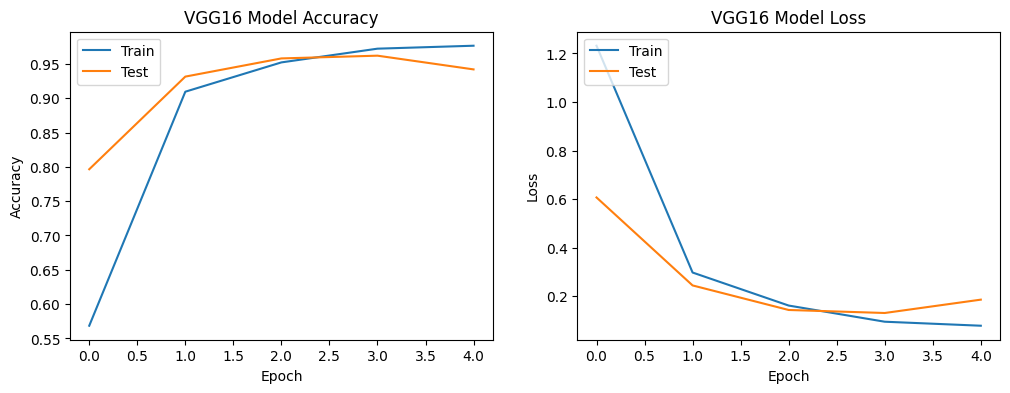

In [3]:
# ## VGG16 Model

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
vgg_model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg = vgg_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

plot_results(history_vgg, 'VGG16')

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 433s 3s/step - accuracy: 0.8669 - loss: 0.4658 - val_accuracy: 0.1170 - val_loss: 5.0275
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 398s 3s/step - accuracy: 0.9543 - loss: 0.2500 - val_accuracy: 0.1170 - val_loss: 5.2956
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - accuracy: 0.9782 - loss: 0.0792 - val_accuracy: 0.1085 - val_loss: 3.7324
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 396s 3s/step - accuracy: 0.9895 - loss: 0.0297 - val_accuracy: 0.1210 - val_loss: 3.2036
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 418s 3s/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.6265 - val_loss: 1.1169
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 416s 3s/step - accuracy: 0.9916 - loss: 0.0343 - val_accuracy: 0.9720 - val_loss: 0.0970
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 411s 3s/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9695 - val_loss: 0.1135
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 400s 3s/step - accuracy: 0.9835 - loss: 0.0591 - val_accu

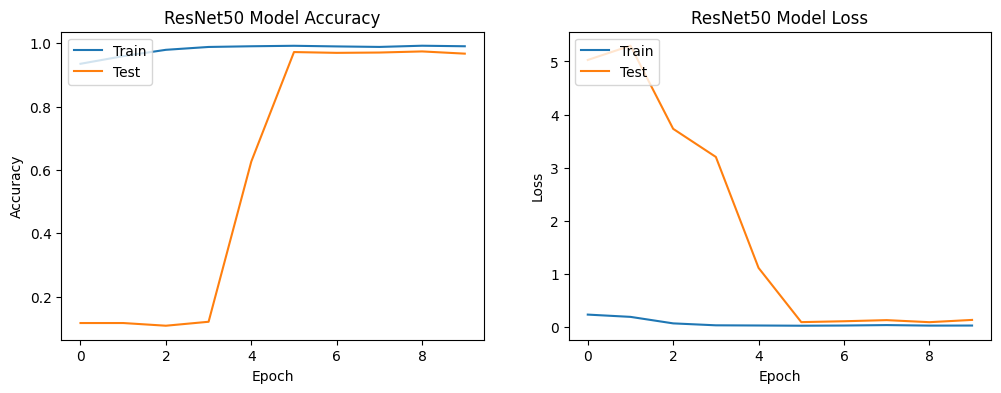

In [4]:
# ## ResNet50 Model

resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
resnet_model = Sequential([
    resnet_base,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_resnet = resnet_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

plot_results(history_resnet, 'ResNet50')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 30s 0us/step
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.7009 - loss: 0.9043 - val_accuracy: 0.9425 - val_loss: 2.7760
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9545 - loss: 0.3661 - val_accuracy: 0.3075 - val_loss: 1493.6538
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9689 - loss: 0.1310 - val_accuracy: 0.9825 - val_loss: 0.0671
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9827 - loss: 0.0632 - val_accuracy: 0.9395 - val_loss: 0.2478
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9804 - loss: 0.0758 - val_accuracy: 0.1680 - val_loss: 145.8830
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.7755 - loss: 1.1545 - val_accuracy: 0.7690 - val_loss: 0.9679
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9458 - loss: 0.2650 - val_accuracy: 0.9015 - val_loss: 5.7859
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 

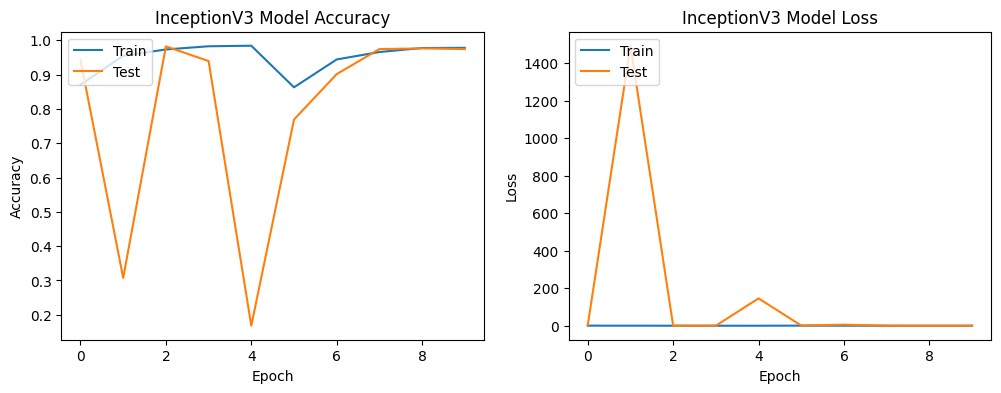

In [5]:
# ## InceptionV3 Model

inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
inception_model = Sequential([
    inception_base,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_inception = inception_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

plot_results(history_inception, 'InceptionV3')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


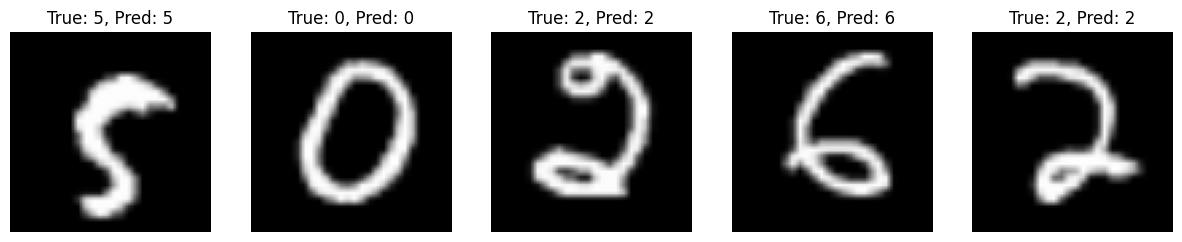

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


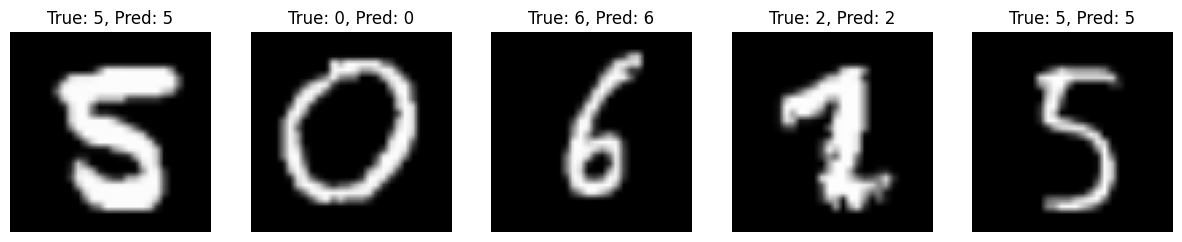

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


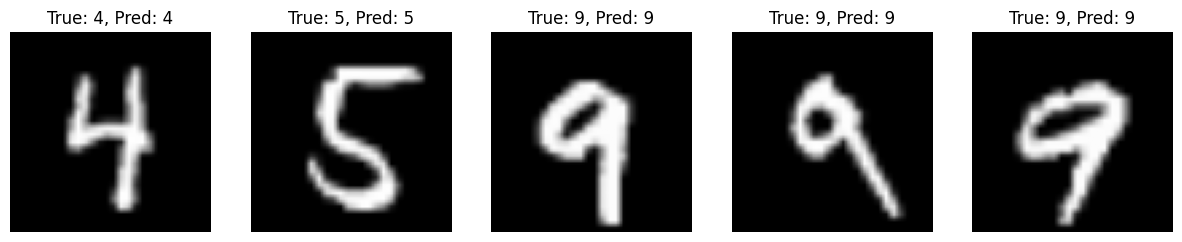

In [6]:
# Function to visualize predictions
def visualize_predictions(model, x_test, y_test, n_samples=5):
    indices = np.random.choice(np.arange(len(x_test)), n_samples, replace=False)
    x_sample = x_test[indices]
    y_sample = y_test[indices]
    y_pred = np.argmax(model.predict(x_sample), axis=1)
    y_true = np.argmax(y_sample, axis=1)

    plt.figure(figsize=(15, 5))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i+1)
        plt.imshow(x_sample[i].reshape(75, 75, 3))
        plt.title(f'True: {y_true[i]}, Pred: {y_pred[i]}')
        plt.axis('off')
    plt.show()

# Visualize predictions for VGG16 model
visualize_predictions(vgg_model, x_test, y_test)

# Visualize predictions for ResNet50 model
visualize_predictions(resnet_model, x_test, y_test)

# Visualize predictions for InceptionV3 model
visualize_predictions(inception_model, x_test, y_test)


# Conclusion

In this section, we explored advanced Convolutional Neural Network (CNN) architectures, including VGG16, ResNet50, and InceptionV3. These architectures have significantly improved the performance and efficiency of CNNs by addressing various limitations of traditional models. Through practical implementation using TensorFlow and Keras, we demonstrated how these architectures can be applied to the MNIST dataset, achieving high accuracy and efficient training.

### Key Takeaways:

1. **VGG16**:
   - Uses small (3x3) convolution filters to build deep networks.
   - Emphasizes simplicity and uniformity in design.
   - Suitable for tasks requiring detailed feature extraction.

2. **ResNet50**:
   - Introduces residual connections to mitigate the vanishing gradient problem.
   - Enables the training of very deep networks without performance degradation.
   - Ideal for tasks where very deep networks are beneficial.

3. **InceptionV3**:
   - Uses Inception modules to capture features at multiple scales.
   - Balances computational cost and accuracy.
   - Effective for complex image recognition tasks.

By leveraging these advanced architectures, we can achieve state-of-the-art performance in various computer vision tasks, making them indispensable tools in the field of deep learning and artificial intelligence.
